# In Class Notebook, Week 05

You can always paste the URL of this notebook (https://github.com/UIUC-iSchool-DataViz/is445_AOUAOG_fall2021/blob/master/week05/inClass_week05.ipynb ) into the nbviewer interface for a plain-text rendering:

https://kokes.github.io/nbviewer.js/viewer.html

## Review from last week

In [1]:
# import usual things:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# newest library
import ipywidgets

In [2]:
buildings = pd.read_csv('https://uiuc-ischool-dataviz.github.io/is445_AOUAOG_fall2021/week02/data/building_inventory.csv',
               na_values={'Square Footage': 0, 
                         'Year Acquired': 0,
                         'Year Constructed': 0, 
                         'Floors':0}) # specifying what 'Column Name': Value is NaN

In [3]:
buildings

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975.0,1975.0,144.0,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8857,Department of Transportation,Belvidere Maintenance Storage Facility - Boone...,9797 Illinois Rte. 76,Belvidere,61008,Boone,16,Adam Kinzinger,69,Sosnowski Joe,...,In Use,NaN,NaN,432.0,1,0,0,Storage,NaN,NaN
8858,Department of Transportation,Belvidere Maintenance Storage Facility - Boone...,9797 Illinois Rte 76,Belvidere,61008,Boone,16,Adam Kinzinger,69,Sosnowski Joe,...,In Use,NaN,NaN,330.0,1,0,0,Storage,NaN,NaN
8859,Department of Transportation,Quincy Maintenance Storage Facility,800 Koch's Lane,Quincy,62305,Adams,18,Darin M. LaHood,94,Frese Randy E.,...,In Use,NaN,1987.0,130.0,1,0,0,Storage,High Hazard,NaN
8860,Illinois Community College Board,Illinois Valley Community College - Oglesby,815 North Orlando Smith Avenue,Oglesby,61348,LaSalle,16,Adam Kinzinger,76,Long Jerry Lee,...,In Use,1971.0,1971.0,49552.0,1,1,0,Education,Education,Not provided


In [8]:
#stats = buildings.groupby("Year Acquired")["Congress Dist"].describe() # Congress dist is numbers, but categorical
stats = buildings.groupby("Year Acquired")["Square Footage"].describe() # square footage is numerical

In [9]:
stats

,count,mean,std,min,25%,50%,75%,max
Year Acquired,,,,,,,,
1753.0,1.0,1200.000000,NaN,1200.0,1200.0,1200.0,1200.00,1200.0
1802.0,2.0,2220.000000,1943.129435,846.0,1533.0,2220.0,2907.00,3594.0
1810.0,3.0,1344.333333,1809.945948,216.0,300.5,385.0,1908.50,3432.0
1832.0,1.0,120000.000000,NaN,120000.0,120000.0,120000.0,120000.00,120000.0
1837.0,1.0,10302.000000,NaN,10302.0,10302.0,10302.0,10302.00,10302.0
...,...,...,...,...,...,...,...,...
2015.0,20.0,15254.650000,29153.085290,144.0,696.0,3152.0,10590.25,105000.0
2016.0,10.0,30483.900000,61864.180491,1152.0,2464.0,3352.5,3793.00,184000.0
2017.0,1.0,6720.000000,NaN,6720.0,6720.0,6720.0,6720.00,6720.0


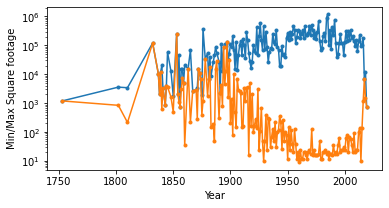

In [13]:
# Step 1: quick plot
fig, ax = plt.subplots(1,1,figsize=(6,3))
ax.plot(stats["max"], marker='.')
ax.plot(stats["min"], marker='.')
ax.set_xlabel("Year")
ax.set_ylabel("Min/Max Square footage")
ax.set_yscale('log')

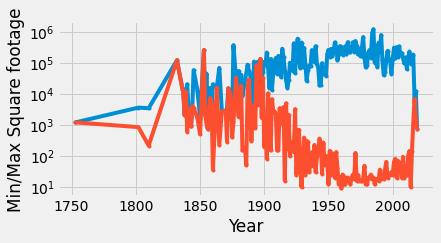

In [17]:
# Step 2: use a fixed value of some parameter I want to change
#. this case: style of the plot
with plt.style.context('fivethirtyeight'): # this style is applied ONLY to this plot and not following
    fig, ax = plt.subplots(1,1,figsize=(6,3))
    ax.plot(stats["max"], marker='.')
    ax.plot(stats["min"], marker='.')
    ax.set_xlabel("Year")
    ax.set_ylabel("Min/Max Square footage")
    ax.set_yscale('log')    

In [18]:
#plt.style.available

In [19]:
# Step 3: make our fixed parameter an input to a function
def make_plot(style):
    with plt.style.context(style): # this style is applied ONLY to this plot and not following
        fig, ax = plt.subplots(1,1,figsize=(6,3))
        ax.plot(stats["max"], marker='.')
        ax.plot(stats["min"], marker='.')
        ax.set_xlabel("Year")
        ax.set_ylabel("Min/Max Square footage")
        ax.set_yscale('log')

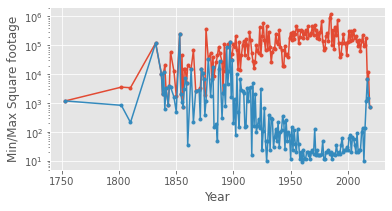

In [20]:
# step 3.5 -- test the function
make_plot("ggplot")

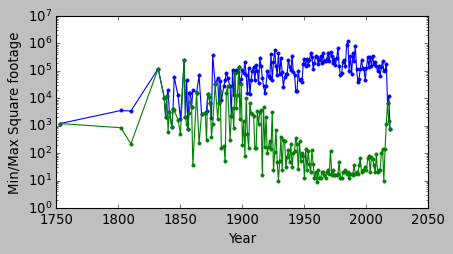

In [21]:
make_plot("classic")

In [73]:
# Step 4: make the function interactive with a ipywidget decorator
@ipywidgets.interact(style=plt.style.available)
def make_plot(style):
    with plt.style.context(style): # this style is applied ONLY to this plot and not following
        fig, ax = plt.subplots(1,1,figsize=(6,3))
        ax.plot(stats["max"], marker='.')
        ax.plot(stats["min"], marker='.')
        ax.set_xlabel("Year")
        ax.set_ylabel("Min/Max Square footage")
        ax.set_yscale('log')
    plt.show()

interactive(children=(Dropdown(description='style', options=('Solarize_Light2', '_classic_test_patch', 'bmh', …

In [74]:
# HW hint:
@ipywidgets.interact(style=plt.style.available, marker_style=['.','o','s'])
def make_plot(style, marker_style):
    with plt.style.context(style): # this style is applied ONLY to this plot and not following
        fig, ax = plt.subplots(1,1,figsize=(6,3))
        ax.plot(stats["max"], marker=marker_style)
        ax.plot(stats["min"], marker=marker_style)
        ax.set_xlabel("Year")
        ax.set_ylabel("Min/Max Square footage")
        ax.set_yscale('log')
    plt.show()

interactive(children=(Dropdown(description='style', options=('Solarize_Light2', '_classic_test_patch', 'bmh', …

## More with widgets

In [24]:
itext = ipywidgets.IntText()
itext

IntText(value=0)

Some tips if this doesn't display:
1. refresh your browser (save first!)
1. close and reopen your jupyter notebook
1. worst case:

```{python}
from IPython.display import display
display(itext)
```

In [25]:
#!jupyter nbextension enable --py widgetsnbextension

In [27]:
itext.value

11

In [29]:
itext.value = 8

In [31]:
ip = ipywidgets.IntProgress(value=70)
ip

IntProgress(value=70)

In [32]:
irange = ipywidgets.IntSlider(min=0, max=100, step=1)
irange

IntSlider(value=0)

In [33]:
ip.keys

['_dom_classes',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'bar_style',
 'description',
 'description_tooltip',
 'layout',
 'max',
 'min',
 'orientation',
 'style',
 'value']

In [34]:
irange.keys

['_dom_classes',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'continuous_update',
 'description',
 'description_tooltip',
 'disabled',
 'layout',
 'max',
 'min',
 'orientation',
 'readout',
 'readout_format',
 'step',
 'style',
 'value']

In [35]:
# want to link:
ip.value

70

In [36]:
# to:
irange.value

72

In [37]:
ipywidgets.jslink?

In [38]:
ipywidgets.jslink((ip,'value'),(irange,'value'))

Link(source=(IntProgress(value=70), 'value'), target=(IntSlider(value=72), 'value'))

In [39]:
ip

IntProgress(value=70)

In [40]:
irange

IntSlider(value=70)

In [41]:
ipywidgets.VBox([ip,irange])

In [42]:
ipywidgets.jslink?

In [43]:
5+6

11

Redo this whole interface with linking on the backend (Python):

In [44]:
ip2 = ipywidgets.IntProgress(value=90)
irange2 = ipywidgets.IntSlider(min=0,max=100,step=1)

In [45]:
ipywidgets.link((ip2,'value'),(irange2,'value'))

In [46]:
ipywidgets.VBox([ip2,irange2])

In [47]:
ipywidgets.link?

More complex example:

In [56]:
button = ipywidgets.Button(description="I am a button!")
button

Button(description='I am a button!', style=ButtonStyle())

I have clicked


In [57]:
def say_click(event): 
    print("I have clicked")

In [58]:
button.on_click?

In [59]:
button.on_click(say_click) # the function we want to have run is the input

In [75]:
button.keys

['_dom_classes',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'button_style',
 'description',
 'disabled',
 'icon',
 'layout',
 'style',
 'tooltip']

In [76]:
button.description

'I am a button!'

In [60]:
#button.on_click(print("hi"))

In [61]:
islider = ipywidgets.IntSlider(min=0,max=100,step=1, orientation='vertical')
islider

IntSlider(value=0, orientation='vertical')

In [62]:
islider.keys

['_dom_classes',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'continuous_update',
 'description',
 'description_tooltip',
 'disabled',
 'layout',
 'max',
 'min',
 'orientation',
 'readout',
 'readout_format',
 'step',
 'style',
 'value']

In [63]:
islider.style.keys

['_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'description_width',
 'handle_color']

In [64]:
islider.style.handle_color="#750075"

In [65]:
islider

IntSlider(value=38, orientation='vertical', style=SliderStyle(handle_color='#750075'))

In [66]:
cp = ipywidgets.ColorPicker()
cp

ColorPicker(value='black')

In [67]:
ipywidgets.link((cp,'value'),(islider.style,'handle_color'))

In [68]:
ipywidgets.VBox([cp,islider])

## Traitlets

In [77]:
class MyObject():
    name = 'unnamed'
    age = 0

In [78]:
my_obj = MyObject() # new variable of MyObject class

In [79]:
my_obj.name

'unnamed'

In [80]:
my_obj.age

0

In [81]:
my_obj.name = "Bob"

In [82]:
my_obj.age = 47

In [83]:
print("Hello, my name is", my_obj.name, "and I am", my_obj.age, "years old")

Hello, my name is Bob and I am 47 years old


In [84]:
my_obj.name = "Linda"; my_obj.age = 45

In [85]:
print("Hello, my name is", my_obj.name, "and I am", my_obj.age, "years old")

Hello, my name is Linda and I am 45 years old


In [86]:
import traitlets

In [88]:
class MyTraitletObject(traitlets.HasTraits):
    name = traitlets.Unicode("unnamed") # traitlets version of a "string"
    age = traitlets.Int(0) # integer, value = 0

In [89]:
my_t_obj = MyTraitletObject()
my_t_obj.age = 47
my_t_obj.name = "Bob"

In [90]:
print("Hello, my name is", my_t_obj.name, "and I am", my_t_obj.age, "years old")

Hello, my name is Bob and I am 47 years old


In [91]:
def name_changed(change): # action/observation function
    print(change)

In [93]:
my_t_obj.observe(name_changed,['name'])
# whenever the trait "name" is changed, run the name_changed function

In [94]:
my_t_obj.name = "Linda"

{'name': 'name', 'old': 'Bob', 'new': 'Linda', 'owner': <__main__.MyTraitletObject object at 0x7fba08f4db90>, 'type': 'change'}


In [95]:
def name_changed2(change): # action/observation function
    #print(change)
    print("Hello, my name is", change['new'], "and I am", change['owner'].age, "years old")

In [96]:
my_t_obj.observe(name_changed2, ['name'])

In [97]:
my_t_obj.name = 'Bob'

{'name': 'name', 'old': 'Linda', 'new': 'Bob', 'owner': <__main__.MyTraitletObject object at 0x7fba08f4db90>, 'type': 'change'}
Hello, my name is Bob and I am 47 years old


In [98]:
my_t_obj.unobserve(name_changed, ['name'])

In [99]:
my_t_obj.name = 'Linda'

Hello, my name is Linda and I am 47 years old


In [100]:
# 1. We have an object with traits -- my_t_obj
# 2. Make a function that does *something* when a trait is updated
# 3. Link function and trait with a .observe call

In [101]:
# 2. -- a function that re-prints out our statement when age changes
def age_changed(change):
    #print("Hello, my name is", change['new'], "and I am", change['owner'].age, "years old")
    print("Hello, my name is", change['owner'].name, "and I am", change['new'], "years old")

In [102]:
# 3. link change in *age* to this age_changed function
my_t_obj.observe(age_changed, ['age'])

In [103]:
my_t_obj.age = 45

Hello, my name is Linda and I am 45 years old


In [104]:
my_t_obj.name, my_t_obj.age = 'Louise', 8

Hello, my name is Louise and I am 45 years old
Hello, my name is Louise and I am 8 years old


## Few more notes about the homework

In [105]:
ufos = pd.read_csv("https://github.com/UIUC-iSchool-DataViz/is445_AOUAOG_fall2021/raw/master/week05/data/ufo-scrubbed-geocoded-time-standardized-00.csv",
                  names = ["date", "city", "state", "country",
                          "shape", "duration_seconds", "duration",
                          "comment", "report_date", "latitude", "longitude"],
                  parse_dates = ["date", "report_date"])

In [106]:
ufos # Unidentifed Flying Objects

,date,city,state,country,shape,duration_seconds,duration,comment,report_date,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.384210,-98.581082
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.200000,-2.916667
3,1956-10-10 21:00:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611
...,...,...,...,...,...,...,...,...,...,...,...
80327,2013-09-09 21:15:00,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,2013-09-30,36.165833,-86.784444
80328,2013-09-09 22:00:00,boise,id,us,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2013-09-30,43.613611,-116.202500
80329,2013-09-09 22:00:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,2013-09-30,38.297222,-122.284444
80330,2013-09-09 22:20:00,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,2013-09-30,38.901111,-77.265556


In [107]:
# a bit of data cleaning -- filling NaN's
ufos = ufos.fillna({'country':'unknown','state':'unknown', 'shape':'unknown'})

In [108]:
ufos

,date,city,state,country,shape,duration_seconds,duration,comment,report_date,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,unknown,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.384210,-98.581082
2,1955-10-10 17:00:00,chester (uk/england),unknown,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.200000,-2.916667
3,1956-10-10 21:00:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611
...,...,...,...,...,...,...,...,...,...,...,...
80327,2013-09-09 21:15:00,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,2013-09-30,36.165833,-86.784444
80328,2013-09-09 22:00:00,boise,id,us,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2013-09-30,43.613611,-116.202500
80329,2013-09-09 22:00:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,2013-09-30,38.297222,-122.284444
80330,2013-09-09 22:20:00,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,2013-09-30,38.901111,-77.265556


In [110]:
# for when we are debugging/testing possible visualizations -- downsampling
nsample = 1000
downSampleMask = np.random.choice(range(len(ufos)), nsample, replace=False)

In [111]:
downSampleMask # yours will look different and that is totally fine!

array([70114,  4795, 60011, 28916, 12883, 54150, 67563, 79776, 67405,
         192, 19302, 13772, 22719, 52486, 47303, 22799, 18485, 38840,
       34194, 26857, 37310, 14715, 29768, 12078, 30055, 67337, 70129,
       70848, 66882, 68540, 58576, 51919, 41927, 13041, 23204, 69201,
        5341,  7202,  8341,  3086, 16524,  5361, 16273, 64059,  6711,
       23779, 59488, 45832, 18224, 18530, 18950, 11341, 34032,  8666,
       14765, 57987, 67290, 73882, 30519, 16410,  9564, 43501, 33928,
       36533, 25568, 48492, 62304,  8409, 40135,  8227, 38465, 47288,
       55286, 22942, 44372,  2329, 78237, 53014,  6741,  1364,  2909,
       52828,  4196, 16712, 14260, 69087, 63026, 32306, 25061, 41185,
       19065, 45530, 52934, 44435, 30177, 35914, 17638, 47910, 20663,
       74630,  2904, 13695, 27148, 66960,  5780, 40983, 21249, 57838,
       33974, 24663, 59630, 63126,   133, 73822, 24643, 39070,  8996,
       46804, 73892, 20819, 48504, 15052, 31620, 79058, 23387, 48368,
       58564, 25046,

In [112]:
ufosDS = ufos.loc[downSampleMask]

In [113]:
ufosDS

,date,city,state,country,shape,duration_seconds,duration,comment,report_date,latitude,longitude
70114,2013-08-27 17:00:00,atlanta,ga,us,fireball,5.0,5 seconds,Green fireballs 2 different sightings over At...,2013-09-09,33.748889,-84.388056
4795,2013-10-26 05:00:00,honolulu,hi,us,flash,3600.0,1 hour,Lightning without thunder and flickering that ...,2013-11-11,21.306944,-157.858333
60011,2012-07-26 23:30:00,avon,nc,us,fireball,1200.0,15-20 minutes,Around 11:30 PM on 7/26/12 me and two of my co...,2012-08-05,35.351944,-75.510833
28916,1983-02-28 21:30:00,tilden,tx,us,fireball,300.0,5 mintues,South Texas non illuminating ball of fire,2008-02-14,28.461667,-98.548889
12883,1999-11-25 18:00:00,angleton,tx,us,light,2.0,a few seconds,Driving home from fishing&#44 and saw a light ...,1999-11-30,29.169167,-95.431667
...,...,...,...,...,...,...,...,...,...,...,...
66780,2009-08-15 23:55:00,percilla,tx,us,light,5.0,5 seconds,Bright yellow light appeared twice,2009-08-27,31.546944,-95.398889
10837,1969-01-01 20:00:00,farmerville,la,us,other,120.0,2 minutes,Five bright white&#44 small balls jumped out o...,1999-07-05,32.773333,-92.405556
57534,2002-07-17 16:30:00,fremont,oh,us,circle,180.0,2-3 minutes,A small silver craft...,2002-08-16,41.350278,-83.121944
48570,1947-06-15 10:00:00,winona (aprox.20 mi.north west of),mn,us,disk,15.0,15 sec,2 unmoving round objets side my side like eyes...,1999-04-02,44.050000,-91.639167


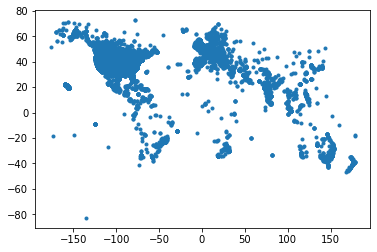

In [114]:
# quick plot
plt.plot(ufos['longitude'], ufos['latitude'],'.')
plt.show()

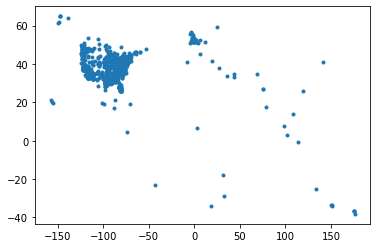

In [115]:
plt.plot(ufosDS['longitude'], ufosDS['latitude'],'.')
plt.show()

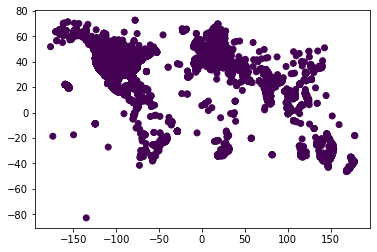

In [116]:
# instead of plot, I'll use scatter:
plt.scatter(ufos['longitude'],ufos['latitude'], c=ufos['duration_seconds'])
plt.show()

In [117]:
ufos['duration_seconds']

0        2700.0
1        7200.0
2          20.0
3          20.0
4         900.0
          ...  
80327     600.0
80328    1200.0
80329    1200.0
80330       5.0
80331    1020.0
Name: duration_seconds, Length: 80332, dtype: float64

In [118]:
ufos['duration_seconds'].min(), ufos['duration_seconds'].max()

(0.001, 97836000.0)

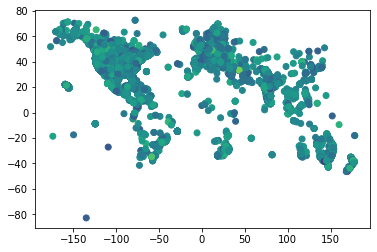

In [119]:
plt.scatter(ufos['longitude'],ufos['latitude'], c=np.log10(ufos['duration_seconds']))
plt.show()

In [120]:
ufos.plot?

## Few more fun things with widgets

In [122]:
ip = ipywidgets.IntProgress(value=50)
ip

IntProgress(value=50)

In [123]:
button_plus = ipywidgets.Button(description="+10")
button_plus

Button(description='+10', style=ButtonStyle())

In [124]:
button_minus = ipywidgets.Button(description="-10")
button_minus

Button(description='-10', style=ButtonStyle())

In [125]:
ipywidgets.HBox([button_minus, ip, button_plus])

In [126]:
def click_down(event):
    ip.value -= 10

In [127]:
button_minus.on_click(click_down)

In [128]:
def click_up(event):
    ip.value += 10
button_plus.on_click(click_up)

In [129]:
# example -- layout with HBox and VBox

ipywidgets.VBox([ipywidgets.HBox([button_minus, button_plus]),ip])